# **Text analysis in Python**

## Word cloud and emotion analysis

In [5]:
# initialisation
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from urllib.request import urlopen
# !pip install nrclex
# need to run the following line to fix the "MissingCorpusError":
# !python -m textblob.download_corpora
from nrclex import NRCLex

In [6]:
# read from UHS press release
url = "https://www.uhs.nhs.uk/whats-new/press-releases/cancer-survivors-hope-for-life-saving-research-on-international-clinical-trials-day"
page = urlopen(url)
html = page.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")
soupText = soup.get_text()


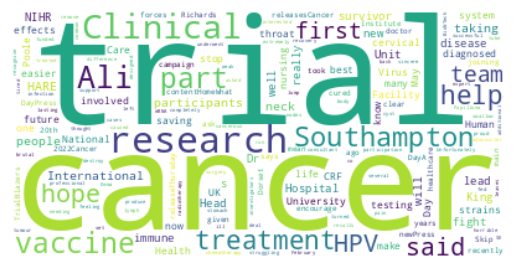

In [7]:
# word cloud
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(soupText)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

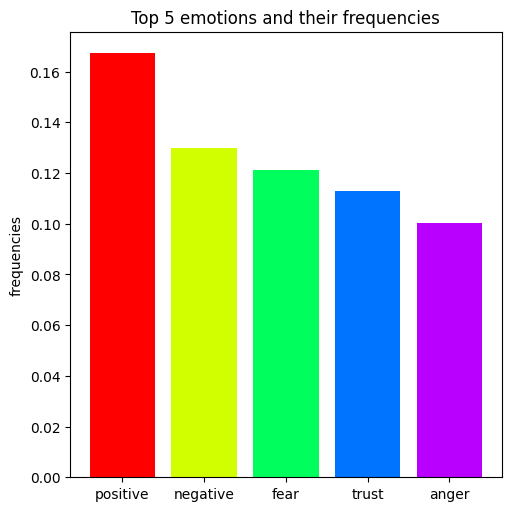

In [8]:
# emotion analysis
text_object = NRCLex(soupText)
affect_freq = (text_object.affect_frequencies)
affect_freq_sorted = {k: v for k, v in sorted(affect_freq.items(), key=lambda item: item[1], reverse=True)}
affect_freq_top5 = dict(list(affect_freq_sorted.items())[0:5])

fig, ax = plt.subplots(figsize=(5,5), layout="constrained")
my_cmap = plt.get_cmap("hsv")
colors = [my_cmap(x/5) for x in range(5)]
ax.bar(list(affect_freq_top5.keys()),list(affect_freq_top5.values()),color=colors)
ax.set_ylabel("frequencies")
ax.set_title("Top 5 emotions and their frequencies")
plt.show()

## Well Done